In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np

import sys
from pathlib import Path

# Add project paths
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root / "src"))

# Import experiment management from HDMF src folder
from simulation_runner import HDMFSimulationRunner
from experiment_manager import ExperimentManager
from plotting import HDMFResultsPlotter
from utils.data_loading import load_all_sc_matrices


In [17]:
experiment_manager = ExperimentManager(project_root, config_path="Homeostatic_Grid", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")

2025-09-17 11:36:02,222 - hdmf_experiment_Homeostatic_Grid - INFO - Experiment 'Homeostatic_Grid' initialized
2025-09-17 11:36:02,224 - hdmf_experiment_Homeostatic_Grid - INFO - Config: Homeostatic grid for objective rate 3.44. Used to then calculate LR->DECAY coefficients. Now supports custom parameter generation functions.
2025-09-17 11:36:02,226 - hdmf_experiment_Homeostatic_Grid - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Homeostatic_Grid


INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid.yaml


In [18]:
plotter = HDMFResultsPlotter(experiment_manager)

# Figure 2

In [25]:
res = experiment_manager.load_experiment_results()
plotter = HDMFResultsPlotter(experiment_manager)

2025-09-17 11:41:38,932 - hdmf_experiment_Homeostatic_Grid - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid.yaml


In [22]:
res['full_results']['observables']['mean_rates'].shape

(11000, 17)

In [24]:
hom_grid = np.stack(res['full_results']['observables']['mean_rates'].flatten())
hom_grid = np.reshape(hom_grid, (100,110,17,90))
hom_grid = 3.44 - np.mean(hom_grid, axis=-1)
hom_grid_mean = np.mean(hom_grid, axis=2)
hom_grid_std = np.std(hom_grid, axis=2)


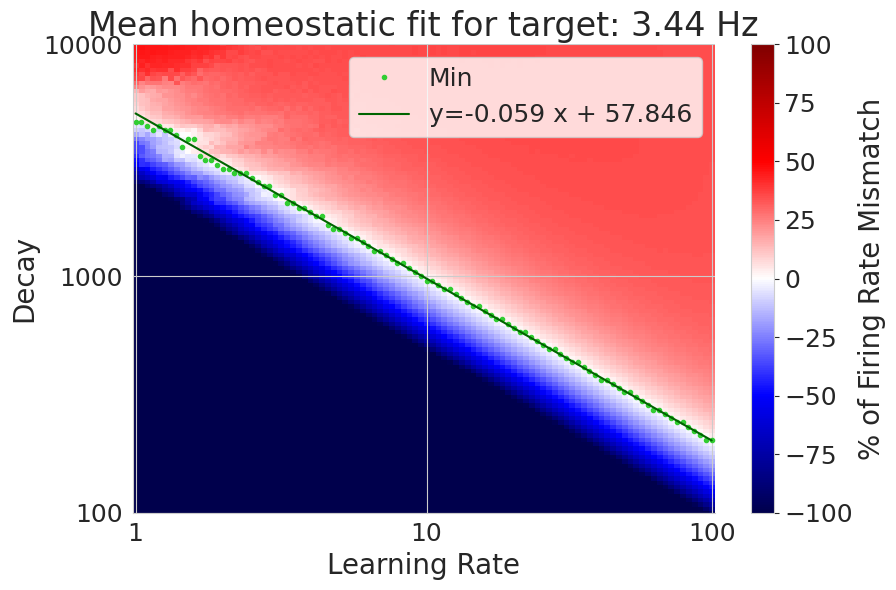

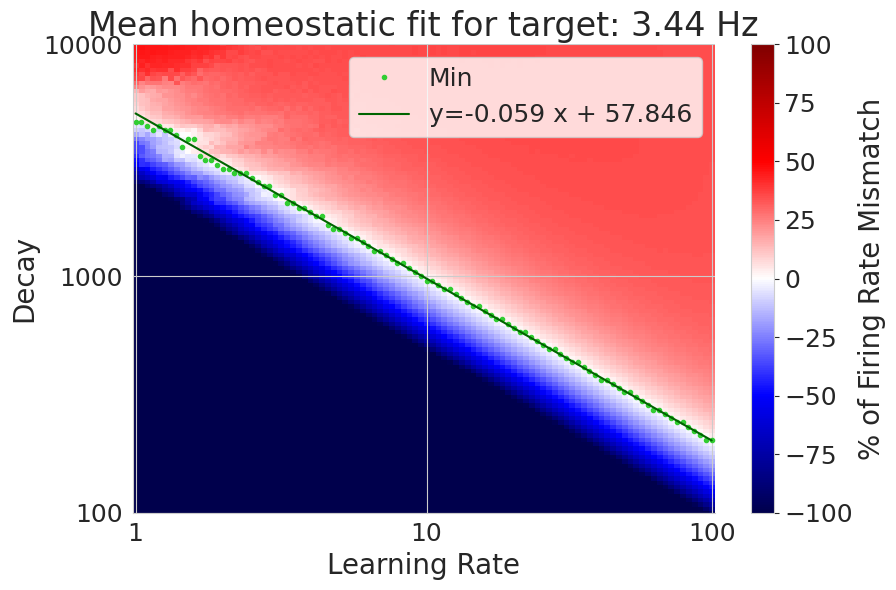

In [27]:
plotter.plot_homeostatic_fit(hom_grid)